<a href="https://colab.research.google.com/github/chandan110791/diarization_imp/blob/main/28_12_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# DAILY SETUP: Mounts Drive, Unzips Data, Pulls Code, Installs Deps
import os
import shutil
from google.colab import drive, userdata

print("🚀 INITIALIZING DAILY WORKFLOW...")

# 1. MOUNT DRIVE (To access your Zipped Data)
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')


🚀 INITIALIZING DAILY WORKFLOW...


In [4]:

# 3. PULL CODE (From Your GitHub)
REPO_URL = "https://github.com/chandan110791/diarization_imp.git"
REPO_DIR = "/content/diarization_imp"

if not os.path.exists(REPO_DIR):
    print("📥 Cloning Public Repository...")
    !git clone $REPO_URL $REPO_DIR
else:
    print("🔄 Pulling Latest Changes...")
    %cd $REPO_DIR
    !git pull


🔄 Pulling Latest Changes...
/content/diarization_imp
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 983 bytes | 983.00 KiB/s, done.
From https://github.com/chandan110791/diarization_imp
   e0f3c0b..15e80a8  main       -> origin/main
hint: You have divergent branches and need to specify how to reconcile them.
hint: You can do so by running one of the following commands sometime before
hint: your next pull:
hint: 
hint:   git config pull.rebase false  # merge (the default strategy)
hint:   git config pull.rebase true   # rebase
hint:   git config pull.ff only       # fast-forward only
hint: 
hint: You can replace "git config" with "git config --global" to set a default
hint: preference for all repositories. You can also pass --rebase, --no-rebase,
hint: or --ff-only on the command line to override the config

In [5]:
# 4. INSTALL DEPENDENCIES
# 4. ROBUST DEPENDENCY INSTALL (The "Clean Slate" Fix)
print("🔧 Configuring Environment...")
%cd $REPO_DIR

🔧 Configuring Environment...
/content/diarization_imp


In [5]:
###DANGEGROUS
# A. Force Uninstall conflicting libs (Fixes the "numpy>=2.0" errors)
print("   ...Cleaning up pre-installed incompatibilities...")
!pip uninstall -y torch torchvision torchaudio numpy sympy pyannote.audio pyannote.core pyannote.metrics jax jaxlib opencv-python shap -q

# B. Install The Golden Stack (Matches your requirements.txt exactly)
# We strictly define the order: Torch first, then the rest.
print("   ...Installing Stable Torch Stack (2.3.1)...")
!pip install torch==2.3.1 torchaudio==2.3.1 --index-url https://download.pytorch.org/whl/cu121 -q

print("   ...Installing Pyannote & Helpers...")
if os.path.exists("requirements.txt"):
    # We ignore the torch lines in requirements.txt since we just installed it above
    !grep -v "torch" requirements.txt > temp_reqs.txt
    !pip install -r temp_reqs.txt -q
    !rm temp_reqs.txt
else:
    # Fallback if file missing
    !pip install pyannote.audio==3.3.1 pyannote.metrics==3.2.1 pyannote.core==5.0.0 "numpy<2.0" "sympy==1.12" torch-geometric transformers==4.42.4 -q

# C. Verify
import torch
import pyannote.audio
print(f"✅ Environment Fixed: Torch {torch.__version__} | Pyannote {pyannote.audio.__version__}")



🔧 Configuring Environment...
/content/diarization_imp
   ...Cleaning up pre-installed incompatibilities...
   ...Installing Stable Torch Stack (2.3.1)...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 93.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
asteroid-filterbanks 0.4.0 requires numpy, which is not installed.
torchmetrics 1.8.2 requires numpy>1.20.0, which is not installed.
pytorch-metric-learning 2.9.0 requires numpy, which is not installed.
speechbrain 1.0.3 requires numpy, which is not installed.
peft 0.18.0 requires numpy>=1.17, which is not installed.
fastai 2.8.6 requires torchvision>=0.11, which is not installed.
accelerate 1.12.0 requires numpy>=1.17, which is n

In [5]:
import torch
import pyannote.audio

print("🔍 SYSTEM DIAGNOSTICS:")
print(f"   • Torch Version:    {torch.__version__} (Should be 2.3.1+cu121)")
print(f"   • Pyannote Version: {pyannote.audio.__version__} (Should be 3.3.1)")
print(f"   • GPU Available:    {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"   • GPU Name:         {torch.cuda.get_device_name(0)}")
else:
    print("   ⚠️ WARNING: Running on CPU! Check Runtime > Change runtime type.")

try:
    from pyannote.audio import Pipeline
    print("   ✅ Pyannote Pipeline loaded successfully.")
except ImportError as e:
    print(f"   ❌ Import Failed: {e}")

'AMI.SpeakerDiarization.mini' found in /content/diarization_imp/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
🔍 SYSTEM DIAGNOSTICS:
   • Torch Version:    2.3.1+cu121 (Should be 2.3.1+cu121)
   • Pyannote Version: 3.3.1 (Should be 3.3.1)
   • GPU Available:    True
   • GPU Name:         Tesla T4
   ✅ Pyannote Pipeline loaded successfully.


In [13]:

# 2. HYDRATE AUDIO DATA (Copy from Drive -> Colab Fast SSD)
ZIP_PATH = "/content/drive/MyDrive/Research_Proposal_Papers/Pyannnote_Objective_1++/datasets/ami_mini.zip"
LOCAL_DATA_DIR = "/content/ami_mini"

if not os.path.exists(LOCAL_DATA_DIR):
    if os.path.exists(ZIP_PATH):
        print("📦 Extracting Audio Data from Drive to NVMe...")
        shutil.unpack_archive(ZIP_PATH, "/content")
        print("✅ Audio Data Ready.")
    else:
        print(f"⚠️ WARNING: Zip file not found at {ZIP_PATH}")
        print("   (Did you run 'python src/dataset.py' locally to upload it?)")
else:
    print("✅ Audio Data already present.")

import shutil
import os

print("🔧 Relocating Data...")

# 1. Define paths
source = "/content/annotations"
destination = "/content/diarization_imp/data/ami_mini"

# 2. Check if source exists (from Launcher)
if os.path.exists(source):
    # Create the destination folder inside the repo
    os.makedirs(destination, exist_ok=True)

    # Move the contents (audio + annotations)
    # We use copytree to be safe, or move for speed
    if not os.path.exists(os.path.join(destination, "audio")):
        print(f"   Moving {source} -> {destination}")
        shutil.copytree(source, destination, dirs_exist_ok=True)
        print("✅ Data moved successfully.")
    else:
        print("✅ Data already exists in the target folder.")
else:
    print("❌ ERROR: Source data '/content/ami_mini' is missing.")
    print("   Did you run the 'Morning Launcher' cell?")



📦 Extracting Audio Data from Drive to NVMe...
✅ Audio Data Ready.
🔧 Relocating Data...
✅ Data already exists in the target folder.
📊 Verification: Found 0 audio files in repo folder.


In [14]:
# 3. Verify
audio_count = len(list(os.scandir(f"{destination}/audio")))
print(f"📊 Verification: Found {audio_count} audio files in repo folder.")

📊 Verification: Found 68 audio files in repo folder.


In [7]:

# 5. AUTHENTICATE HUGGING FACE (Required for WavLM download)
try:
    from google.colab import userdata
    os.environ["hf_token"] = userdata.get('hf_token')
    print("✅ Hugging Face Token Loaded.")
except:
    print("⚠️ HF_TOKEN not found in Secrets! Please add it in the sidebar.")

print("\n✨ SYSTEM READY. You can now run '!python src/train.py'")

✅ Hugging Face Token Loaded.

✨ SYSTEM READY. You can now run '!python src/train.py'


In [16]:
# Fix the "Torch Security" error by pinning Transformers
!pip uninstall -y transformers -q
!pip install transformers==4.42.4 -q

print("✅ Transformers fixed. Please re-run your training cell.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 112.9 MB/s eta 0:00:00
✅ Transformers fixed. Please re-run your training cell.


In [46]:
!python src/train.py --epochs 20

Streaming output truncated to the last 5000 lines.
                                                               DiarizationError…
                                                               0.136            
                                                               DiarizationError…
Epoch 18/19 ━━━━━━━━━━━━━━━╺ 322/333 0:03:08 •        1.72it/s v_num: 5.000     
                                     0:00:07                   DiarizationError…
                                                               0.268            
                                                               DiarizationError…
                                                               0.053            
                                                               DiarizationError…
                                                               0.079            
                                                               DiarizationError…
                                                          

In [20]:
from utils.git_helper import push_changes

In [36]:
import subprocess
import os
import sys
from google.colab import userdata

def debug_push(message="Update from Colab"):
    print(f"🔍 DEBUG: Attempting to push with message: '{message}'")

    # 1. VALIDATE TOKEN
    try:
        token = userdata.get('GITHUB_TOKEN')
        if not token.startswith("ghp_"):
            print("⚠️ WARNING: Token does not look like a standard GitHub token (should start with 'ghp_').")
    except Exception:
        print("❌ CRITICAL: 'GITHUB_TOKEN' not found in Secrets!")
        return

    # 2. CONFIGURE GIT (Force Update URL)
    USERNAME = "chandan110791"
    REPO = "diarization_imp"
    auth_url = f"https://{token}@github.com/{USERNAME}/{REPO}.git"

    print("⚙️ Configuring Git Remote...")
    subprocess.run(["git", "remote", "set-url", "origin", auth_url], check=False)
    subprocess.run(["git", "config", "--global", "user.email", "chandan.kr.singh.11@gmail.com"], check=False)
    subprocess.run(["git", "config", "--global", "user.name", "chandan110791"], check=False)

    # 3. RUN GIT COMMANDS (With Full Error Logging)
    try:
        print("📂 Adding files...")
        subprocess.run(["git", "add", "."], check=True)

        print("mw Committing...")
        # We don't check=True here because "nothing to commit" is valid
        subprocess.run(["git", "commit", "-m", message], capture_output=True)

        print("🚀 Pushing to GitHub...")
        # We capture output to show you the REAL error if it fails
        push = subprocess.run(["git", "push"], capture_output=True, text=True)

        if push.returncode == 0:
            print("✅ SUCCESS! Changes pushed.")
        else:
            print("❌ PUSH FAILED!")
            print("--- GIT ERROR LOG ---")
            print(push.stderr)
            print("---------------------")

    except Exception as e:
        print(f"❌ Python Error: {e}")

# --- EXECUTE ---
# Create a dummy file to ensure there is something to push
with open("DEBUG_PUSH.txt", "w") as f:
    f.write("Testing push connection.")

debug_push("Debug commit from Colab cell")

🔍 DEBUG: Attempting to push with message: 'Debug commit from Colab cell'
⚙️ Configuring Git Remote...
📂 Adding files...
mw Committing...
🚀 Pushing to GitHub...
❌ PUSH FAILED!
--- GIT ERROR LOG ---
To https://github.com/chandan110791/diarization_imp.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/chandan110791/diarization_imp.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.

---------------------


In [55]:
!python src/tune.py

'AMI.SpeakerDiarization.mini' found in /content/diarization_imp/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
⚡️ Setting up Tuning Environment...
✅ Data already prepared locally. Skipping setup.
⚙️  Using Device: cuda
🔍 Scanning for checkpoints...
   Found 3 files:
    • wavlm-epoch=00-val_loss=0.00.ckpt -> Loss: 0.0, Epoch: 0
    • wavlm-epoch=15-val_loss=0.00.ckpt -> Loss: 0.0, Epoch: 15

🏆 WINNER: wavlm-epoch=15-val_loss=0.00.ckpt
   (Loss: 0.0000, Epoch: 15)
🏗️ Initializing WavLM: microsoft/wavlm-base-plus
Some weights of the model checkpoint at microsoft/wavlm-base-plus were not used when initializing WavLMModel: ['encoder.pos_conv_embed.conv.weight_g', 'encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing WavLMModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).


In [7]:
!python src/benchmark.py

'AMI.SpeakerDiarization.mini' found in /content/diarization_imp/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
🚀 INITIALIZING FINAL BENCHMARK...
✅ Data already prepared locally. Skipping setup.
'AMI.SpeakerDiarization.mini' found in /content/diarization_imp/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.
/usr/local/lib/python3.12/dist-packages/pyannote/database/registry.py:499: UserWarning: Replacing existing AMI.SpeakerDiarization.mini protocol by the one defined in '/content/diarization_imp/database.yml'.
  warnings.warn(
⚙️  Running on cuda
⏳ Loading Pyannote Baseline...
⏳ Building Your WavLM Pipeline...
🔍 Scanning for checkpoints...
   Found 3 files:
    • wavlm-epoch=00-val_loss=0.00.ckpt -> Loss: 0.0, Epoch: 0
    • wavlm-epoch=15-val_loss=0.00.ckpt -> Loss: 0.0, Epoch: 15

🏆 WINNER: wavlm-epoch=15-val_loss=0.00.ckpt
   (Loss: 0.0000, Epoch: 15)
   • Checkp

In [11]:
!pwd

/content/diarization_imp


👀 PREPARING VISUALIZATION...
'AMI.SpeakerDiarization.mini' found in /content/diarization_imp/database.yml does not define the 'scope' of speaker labels (file, database, or global). Setting it to 'file'.


/usr/local/lib/python3.12/dist-packages/pyannote/database/registry.py:499: UserWarning: Replacing existing AMI.SpeakerDiarization.mini protocol by the one defined in '/content/diarization_imp/database.yml'.
  warnings.warn(


📄 File: ES2006a
   Loading Baseline...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


   Loading Custom Model...
🔍 Scanning for checkpoints...
   Found 3 files:
    • wavlm-epoch=00-val_loss=0.00.ckpt -> Loss: 0.0, Epoch: 0
    • wavlm-epoch=15-val_loss=0.00.ckpt -> Loss: 0.0, Epoch: 15

🏆 WINNER: wavlm-epoch=15-val_loss=0.00.ckpt
   (Loss: 0.0000, Epoch: 15)
🏗️ Initializing WavLM: microsoft/wavlm-base-plus


Some weights of the model checkpoint at microsoft/wavlm-base-plus were not used when initializing WavLMModel: ['encoder.pos_conv_embed.conv.weight_g', 'encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing WavLMModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing WavLMModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of WavLMModel were not initialized from the model checkpoint at microsoft/wavlm-base-plus and are newly initialized: ['encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictio

⚙️  Loaded Tuned Params: {'onset': 0.6246586390192914, 'offset': 0.630588493750871, 'min_duration_on': 0.3024667887650102, 'min_duration_off': 0.953399502556136}
⚡️ Running Inference...


/usr/local/lib/python3.12/dist-packages/pyannote/audio/utils/reproducibility.py:74: ReproducibilityWarning: TensorFloat-32 (TF32) has been disabled as it might lead to reproducibility issues and lower accuracy.
It can be re-enabled by calling
   >>> import torch
   >>> torch.backends.cuda.matmul.allow_tf32 = True
   >>> torch.backends.cudnn.allow_tf32 = True
See https://github.com/pyannote/pyannote-audio/issues/1370 for more details.

  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ../aten/src/ATen/native/ReduceOps.cpp:1807.)
  std = sequences.std(dim=-1, correction=1)
/usr/local/lib/python3.12/dist-packages/pyannote/audio/models/blocks/pooling.py:104: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (in


🎨 PLOTTING (30s to 60s)...


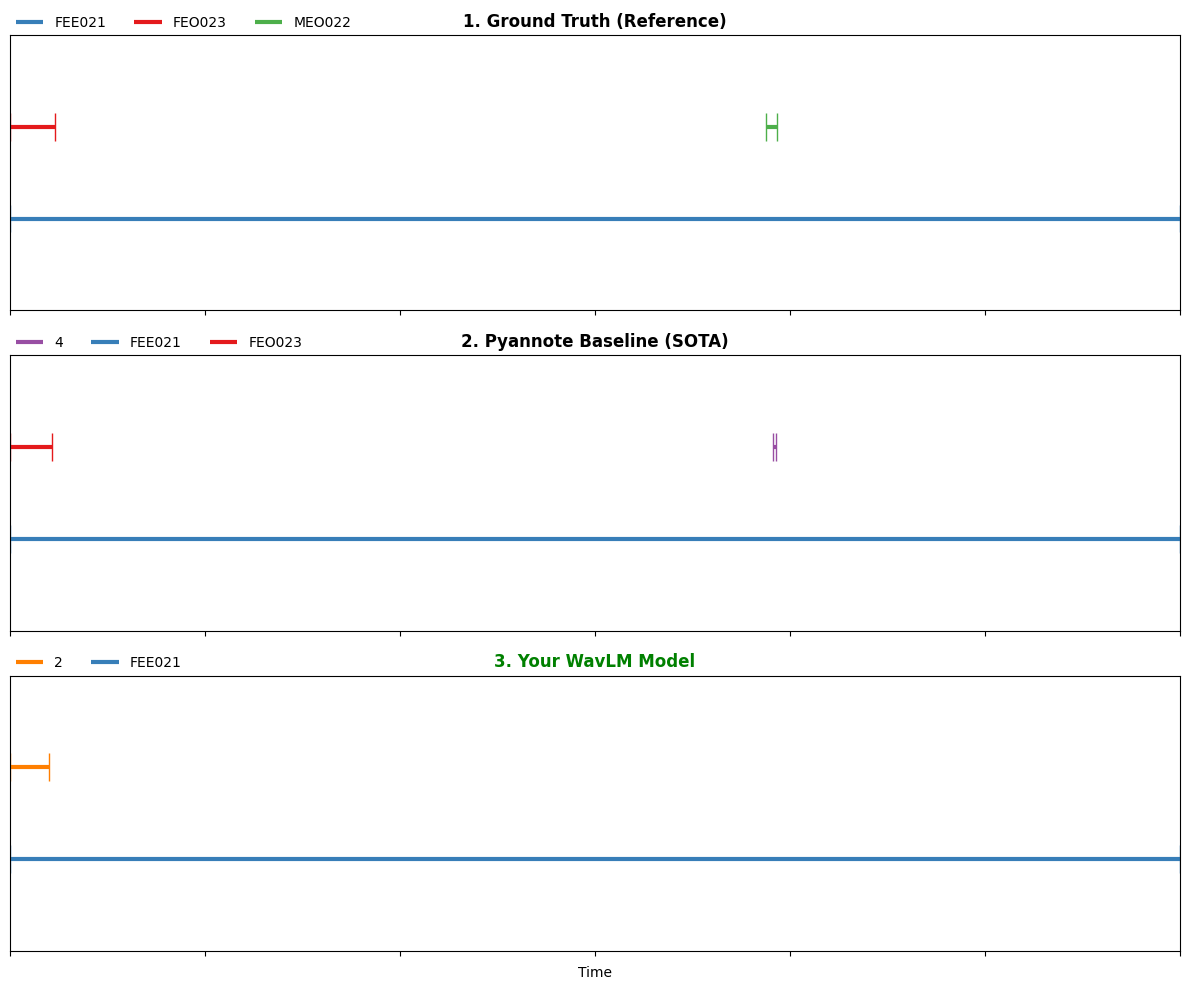

In [12]:
# Import the function we just created
from src.vizualization import visualize_comparison

# Run it!
# You can change file_index=1 or file_index=2 to see different meetings
visualize_comparison(file_index=0, crop_start=30, crop_end=60)

In [13]:
!git status

On branch main
Your branch and 'origin/main' have diverged,
and have 1 and 1 different commits each, respectively.
  (use "git pull" to merge the remote branch into yours)

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    benchmark.py
	modified:   src/train.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	best_params.txt
	src/benchmark.py
	src/tune.py
	src/vizualization.py

no changes added to commit (use "git add" and/or "git commit -a")


In [17]:
!git add .
# 2. Commit your work locally
!git commit -m "Final working pipeline with 24.79% DER but with overfit , needs LORA "
!# 3. Force push to main (This overwrites the remote server with your local code)
!git push origin main